In [6]:
import glob
import tifffile
import numpy as np
import lightgbm as lgb
import warnings
import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.simplefilter('ignore')

In [2]:
train_path =  '../train/s2_image/'
mask_path = '../train/mask/'

masks = glob.glob(f'{mask_path}/*')
trains = glob.glob(f'{train_path}/*')
masks.sort()
trains.sort()

(23, 23, 12) (23, 23)
(23, 23, 3)


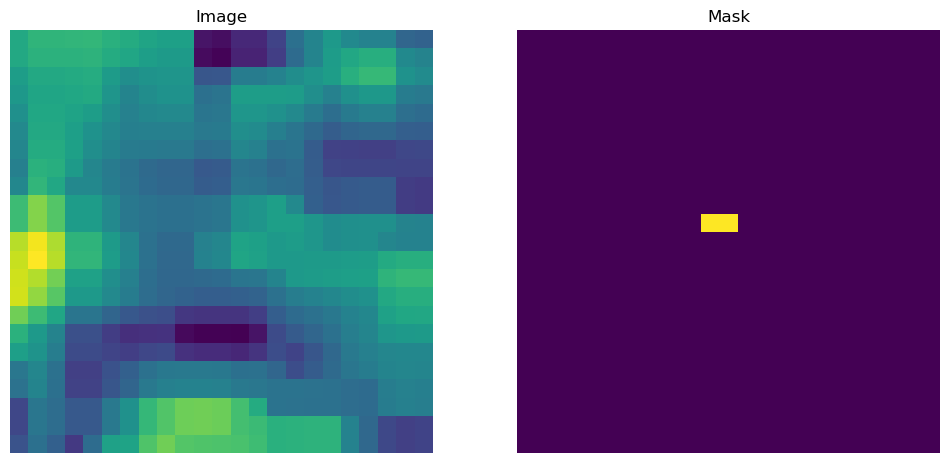

In [59]:
idx = 12
img = tifffile.imread(trains[idx]).astype(np.float64)
mask = tifffile.imread(masks[idx]).astype(np.float64)
print(img.shape, mask.shape)

red = img[:,:,3]
green = img[:,:,2]
blue = img[:,:,1]

def normalize(band):
    band_min, band_max = (band.min(), band.max())
    return ((band-band_min)/((band_max - band_min)))

red_n = normalize(red)
green_n = normalize(green)
blue_n = normalize(blue)

rgb_composite_n= np.dstack((red_n, green_n, blue_n))
print(rgb_composite_n.shape)

# 그림을 그릴 플롯을 생성합니다.
plt.figure(figsize=(12, 6))

# 이미지를 첫 번째 subplot에 그립니다.
plt.subplot(1, 2, 1)
# plt.imshow(rgb_composite_n)  # 이미지를 그레이 스케일로 표시
plt.imshow(img[:,:,6])  # 이미지를 그레이 스케일로 표시

plt.title('Image')
plt.axis('off')

# 마스크를 두 번째 subplot에 그립니다.
plt.subplot(1, 2, 2)
plt.imshow(mask)  # 마스크를 컬러맵을 적용하여 표시
plt.title('Mask')
plt.axis('off')

# 그림을 표시합니다.
plt.show()




<Axes: >

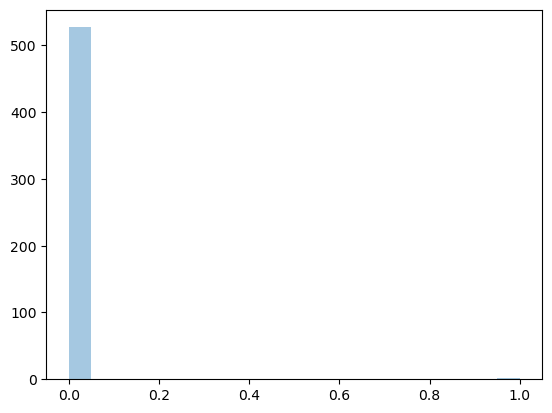

In [52]:
sns.distplot(mask.flatten(),kde=False, bins=20)

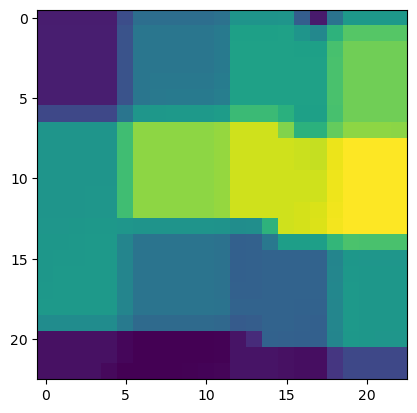

In [61]:
plt.imshow(img[:,:,0])

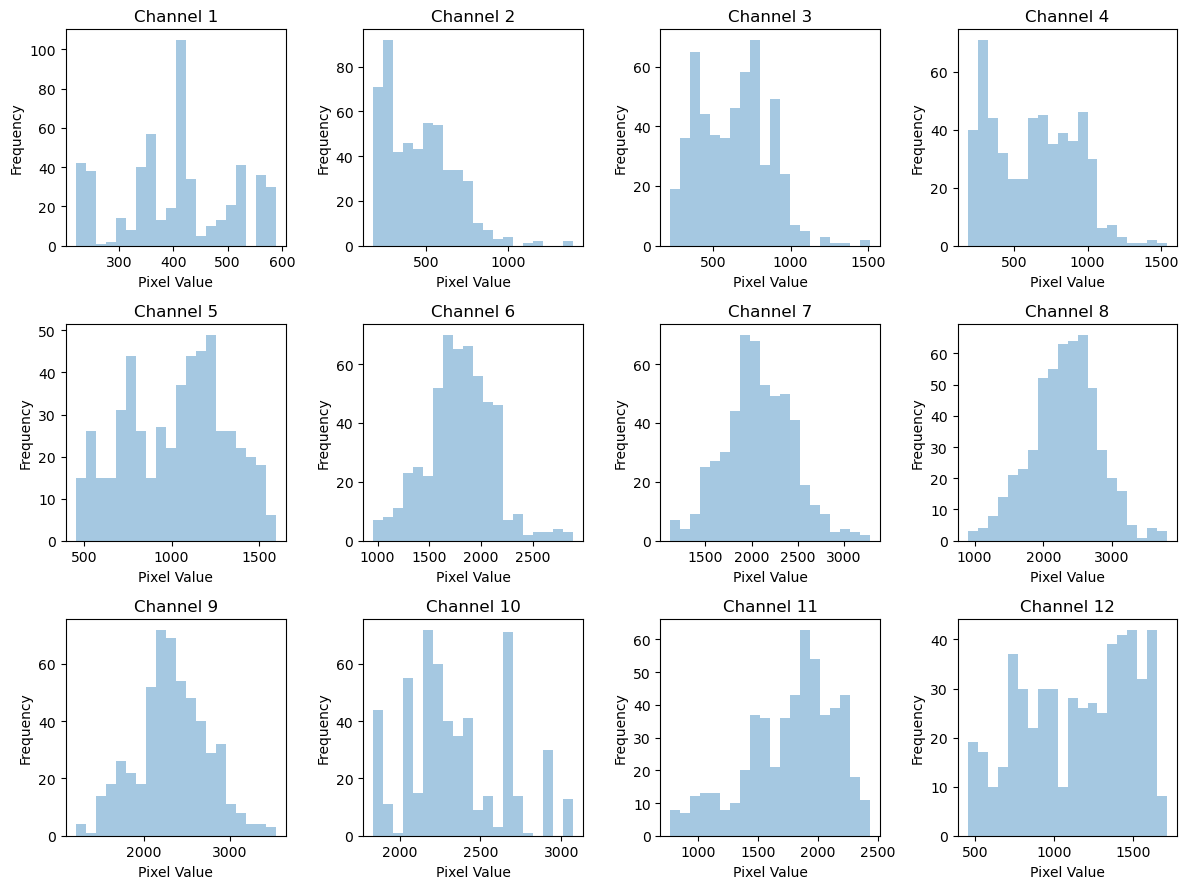

In [62]:
fig, axes = plt.subplots(3, 4, figsize=(12, 9))  

for i in range(3):
    for j in range(4):
        channel_idx = i * 4 + j
        if channel_idx < 12:
            ax = axes[i, j]
            pixel_values = img[:, :, channel_idx].flatten()
            sns.distplot(pixel_values, kde=False, bins=20, ax=ax) 
            ax.set_xlabel('Pixel Value')
            ax.set_ylabel('Frequency')
            ax.set_title(f'Channel {channel_idx + 1}')

plt.tight_layout()
plt.show()


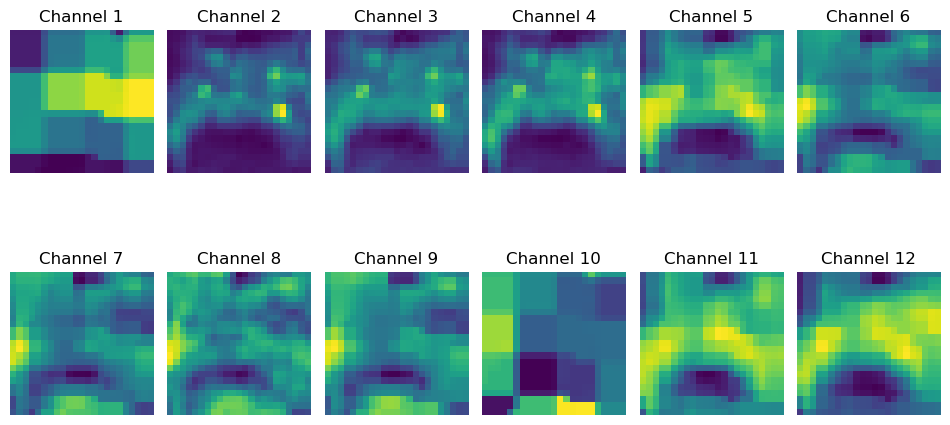

In [63]:
fig, axes = plt.subplots(2, 6, figsize=(12, 6))

for i in range(2):
    for j in range(6):
        channel_idx = i * 6 + j
        if channel_idx < 12:
            ax = axes[i, j]
            ax.imshow(img[:, :, channel_idx])  # 각 채널을 흑백 이미지로 표시
            ax.set_title(f'Channel {channel_idx + 1}')
            ax.axis('off')  # 눈금 표시를 비활성화합니다.

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()


In [30]:
def normalize(band):
    band_min, band_max = (band.min(), band.max())
    return ((band-band_min)/((band_max - band_min)))

In [31]:
img_1 = normalize(img[:,:,3]) #Red
img_2 = normalize(img[:,:,2]) #Green
img_3 = normalize(img[:,:,1]) #Blue

In [32]:
temp_img= np.dstack((img_1, img_2, img_3))
temp_img.shape

(23, 24, 3)

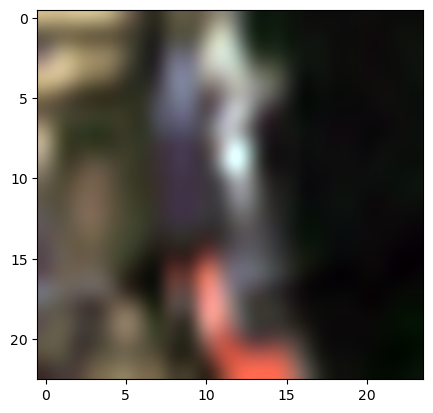

In [34]:
import matplotlib.pyplot as plt

plt.imshow(temp_img,interpolation='lanczos')